## Installing and importing Libraries

In [ ]:
pip install tensorflow

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [17]:
cv2.imread('train/bio/cardboard1.jpg').shape

(300, 400, 3)

## Generator

In [50]:
train = ImageDataGenerator(rescale = 1/255)

In [51]:
train_dataset = train.flow_from_directory('train',
                                         target_size = (200, 200),
                                         batch_size = 10,
                                         class_mode = 'binary')

Found 2504 images belonging to 2 classes.


In [52]:
train_dataset.class_indices

{'bio': 0, 'non_bio': 1}

## Model

In [53]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'), 
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'), 
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation = 'relu'),
                                   tf.keras.layers.Dense(1, activation = 'sigmoid')])

## Compiling Model

In [54]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

## Model Fitting

In [55]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 250,
                     epochs = 5,
                     validation_data = train_dataset)

Epoch 1/5
250/250 [==============================] - 80s 318ms/step - loss: 1.1840 - accuracy: 0.5626 - val_loss: 0.6088 - val_accuracy: 0.6354
Epoch 2/5
250/250 [==============================] - 80s 319ms/step - loss: 0.6125 - accuracy: 0.6611 - val_loss: 0.5266 - val_accuracy: 0.7161
Epoch 3/5
250/250 [==============================] - 85s 341ms/step - loss: 0.5382 - accuracy: 0.7385 - val_loss: 0.4021 - val_accuracy: 0.8215
Epoch 4/5
250/250 [==============================] - 93s 371ms/step - loss: 0.4700 - accuracy: 0.7839 - val_loss: 0.3408 - val_accuracy: 0.8742
Epoch 5/5
250/250 [==============================] - 95s 380ms/step - loss: 0.3661 - accuracy: 0.8422 - val_loss: 0.4496 - val_accuracy: 0.7919


## Prediction

In [56]:
dir_path = 'test'
def pred(newImg):
    img = image.load_img(newImg,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("Biodegradable ")
    else:
        print("Non - Biodegradable ")

In [59]:
cap = cv2.VideoCapture(0)
cap.set(3,200) #Camera Parameter
cap.set(4,200)
#count=1
while True:
    success, web = cap.read()
    cv2.imshow("Web Cam",web)
    web = cv2.flip(web,1)
    path = 'test1'
    k = cv2.waitKey(1)
    #if k%256 == 27:
     #   break
    if k%256 == 32:
        cv2.imwrite(os.path.join(path , 'imgT.jpg'),web)
        print('taken')
        break
cap.release()
cv2.destroyAllWindows()

taken


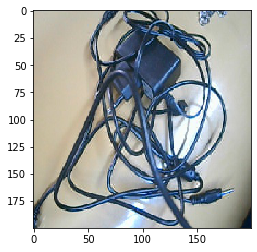

Biodegradable 


In [61]:
pred('test1/imgT.jpg')

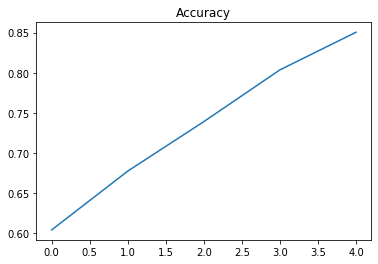

In [63]:
plt.title("Accuracy")
plt.plot(model_fit.history["accuracy"])
plt.show()